<a href="https://colab.research.google.com/github/Advanced-Data-Science-TU-Berlin/Data-Science-Training-Python-Part-2/blob/main/interactive_notebooks/2_1_2_Mall_Customer_Segmentation_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mall Customer Segmentation
![picture](https://www.aimtechnologies.co/wp-content/uploads/2023/09/customer-segmentation-social.png)
The dataset used in this example is the "Mall Customer Segmentation" dataset. This dataset is commonly used for customer segmentation analysis, a task where the goal is to divide customers into groups based on certain characteristics.

Here's more information about the columns in the dataset:

*   **CustomerID**: A unique identifier for each customer.
*   **Gender**: The gender of the customer (e.g., Male or Female).
*   **Age**: The age of the customer.
*   **Annual Income (k$)**: The annual income of the customer in thousands of dollars.
*   **Spending Score (1-100)**: A score assigned to the customer by the mall based on their spending behavior and various parameters.

In [ ]:
!pip install yellowbrick

In [ ]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
url = "https://raw.githubusercontent.com/rileypredum/mall_customer_segmentation/master/Mall_Customers.csv"

# Import the data
df = pd.read_csv(url)

# Look at few rows of data
display(df.head())


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploratory Data Analysis (EDA)
As the first step, let's explore the dataset.

In [ ]:
# Add code for basic statistics, missing values, data types, etc.

# Example:
# Display basic statistics
df.describe()

# Display the data types
df.dtypes

# Check for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Pairwise Correlation Plot
A pairwise correlation plot is a graphical representation that allows us to explore the relationships between pairs of numerical variables in a dataset. This type of plot is particularly useful in understanding how different features interact with each other and whether there are any discernible patterns or trends.

**Interpretation:**
- *Positive Correlation:* Points on the scatterplot tend to follow an upward trend. When one variable increases, the other variable also tends to increase.

- *Negative Correlation:* Points on the scatterplot tend to follow a downward trend. When one variable increases, the other variable tends to decrease.

- *No Correlation:* Points on the scatterplot appear randomly distributed, indicating a lack of a clear relationship between the variables.


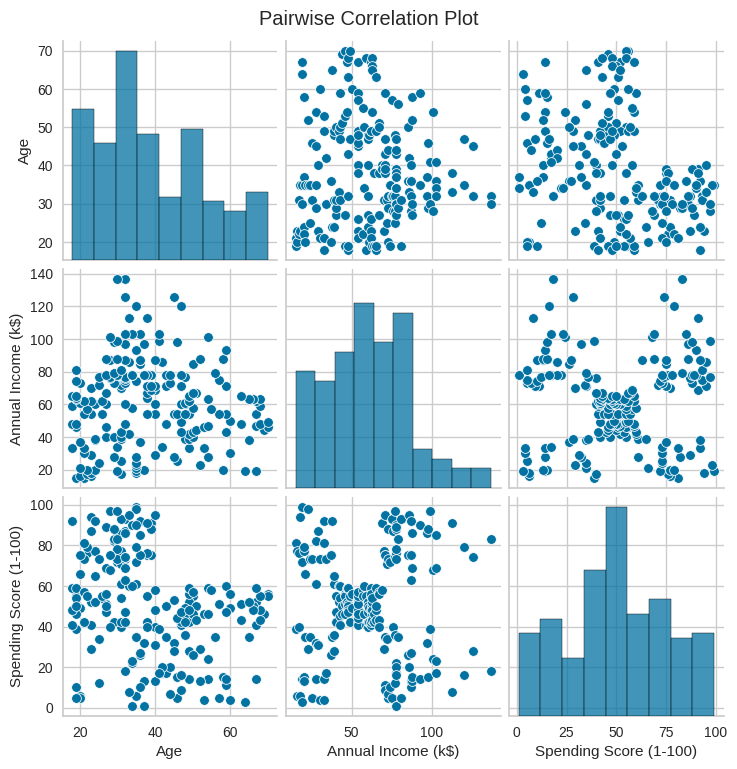

In [ ]:
import seaborn as sns

# Select numerical columns for correlation plot.
numerical_cols = list(df.select_dtypes(include=[np.number]).columns)

# Should we include CustomerID?
# CustomerID is considered as an identifier and doesn't provide meaningful information for clustering, as it is likely to be unique for each customer.
numerical_cols.remove('CustomerID')

# Create a pairwise correlation plot
sns.pairplot(df[numerical_cols])
plt.suptitle("Pairwise Correlation Plot", y=1.02)
plt.show()

### Feature Selection

- Can you think of relevant features for clustering in this data?

For clustering, we are interested in understanding customer segments based on their income and spending behavior. Therefore, we select 'Annual Income (k$)' and 'Spending Score (1-100)' as our relevant features.


In [ ]:
# Select relevant features for clustering (e.g., 'Annual Income (k$)' and 'Spending Score (1-100)')
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

## Data Preprocessing

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Determining the Optimal Number of Clusters (K)
Use the Elbow Method to find the optimal number of clusters (K)

### Elbow Method

The Elbow Method helps us determine the optimal number of clusters by looking for the "elbow" point in the WCSS graph.
- WCSS (Within-Cluster Sum of Squares) measures the compactness of the clusters.

#### Sample Elbow Curve
<div>
<img src="https://almablog-media.s3.ap-south-1.amazonaws.com/elbow_2_18740a3e28.png" width="500"/>
</div>


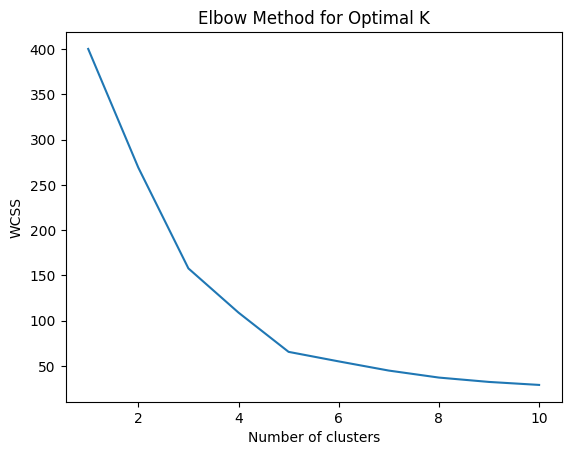

In [ ]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # WCSS stands for Within-Cluster Sum of Squares
plt.show()

What is the best number of clusters according to the Elbow Method?

## K-Means Clustering
Based on the Elbow Method, let's choose the optimal K.

### Applying K-means Clustering
We choose the number of clusters based on the "elbow" observed in the WCSS graph, which indicates a balance between cluster compactness and simplicity.

In [ ]:
k_optimal = 5

# Apply K-means clustering
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Display the clustered data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


## Visualizing Clusters
Let's use a scatter plot to visualize the clusters formed by K-means.

Each point represents a customer, and the color indicates the cluster to which they belong.


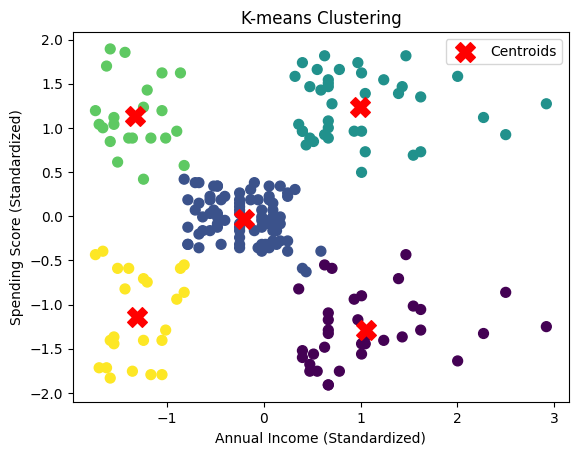

In [ ]:
# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.legend()
plt.show()
